In [3]:
import ipywidgets as widgets
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (15,7)

def dollarK(axis): 
    axis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x/1000) + 'K'))
def dollar(axis): 
    axis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x)))
def xTimes(axis):     
    axis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x) + 'x'))

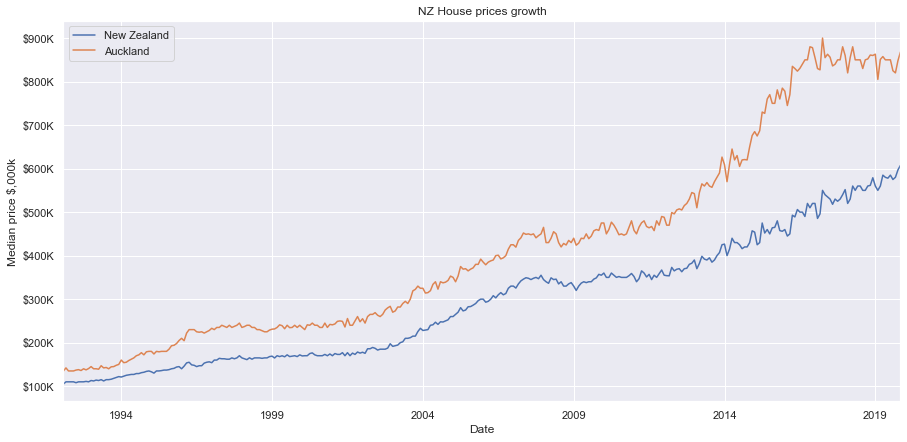

In [5]:
plt.rcParams["figure.figsize"] = (15,7)
housePrices = pd.read_csv('now/house-prices-reinz-1992-now.csv', index_col='Date', parse_dates=True)
ax = housePrices['New Zealand'].plot()
housePrices['Auckland'].plot()
plt.title('NZ House prices growth')
plt.ylabel('Median price $,000k')
dollarK(ax.yaxis)
plt.legend()
plt.show()

Sources: REINZ index

We have data from 1992. The prices in Auckland were always higher than in the rest of NZ and were growing faster till recently

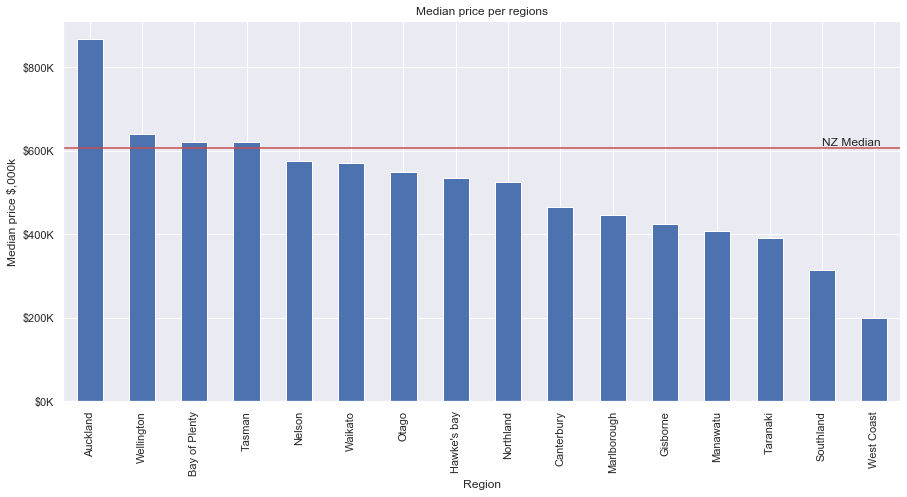

In [6]:
df = housePrices.tail(1).melt(var_name = 'Region', value_name = 'Median Price')
df.set_index('Region', inplace=True)
nzMedian = df.loc['New Zealand', 'Median Price']
df = df.drop('New Zealand')
ax = df.sort_values('Median Price', ascending=False).plot(kind='bar', legend=None)
plt.axhline(y=nzMedian, color='r', linestyle='-', label='NZ Median')
ax.text(y=nzMedian*1.01, x=14, s='NZ Median')
dollarK(ax.yaxis)
plt.ylabel('Median price $,000k')
plt.title('Median price per regions')
plt.show()

Sources: REINZ index

Auckland is far more expensive region. No other regions are much more expensive than the median.

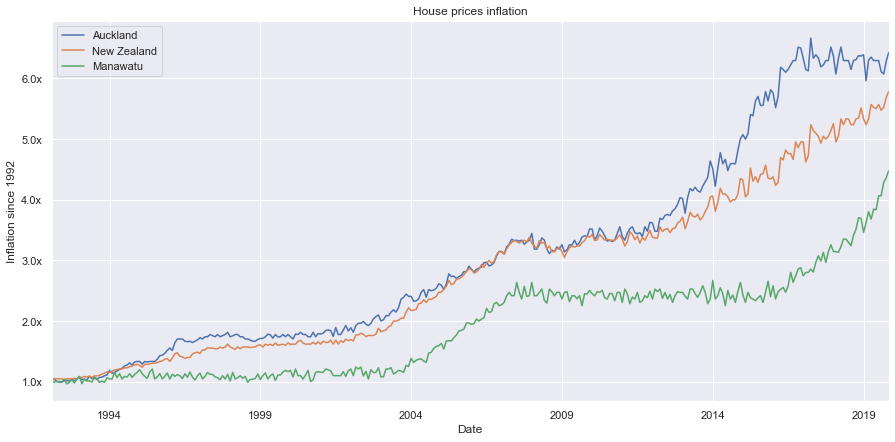

In [7]:
housePricesInflation = housePrices / housePrices.iloc[0]
ax = housePricesInflation[['Auckland', 'New Zealand', 'Manawatu']].plot()
plt.ylabel('Inflation since 1992')
xTimes(ax.yaxis)
plt.title('House prices inflation')
plt.show()

Sources: REINZ Index

Prices were growing very fast and faster for Auckland than for the rest of New Zealand. Now it looks like other regions are probably going to catch up with Auckland at some point.

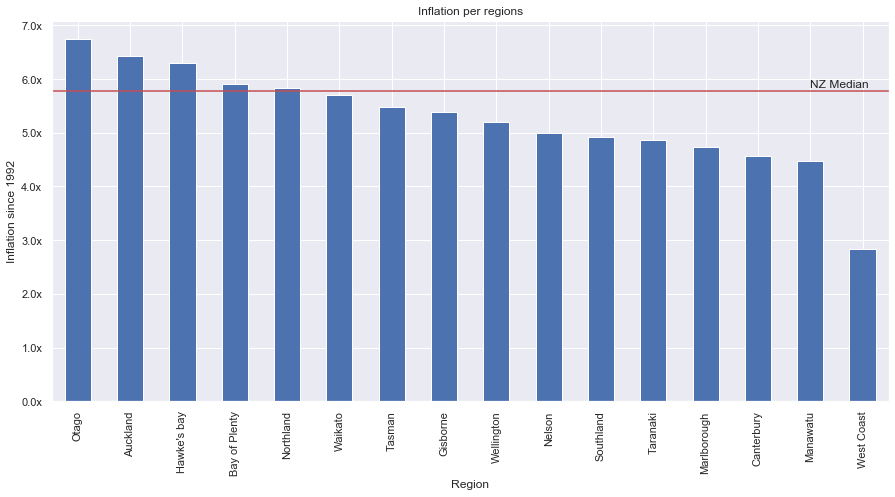

In [8]:
def plotGrowthPerRegions(df):
    df = df.tail(1).melt(var_name = 'Region', value_name = 'Inflation')
    df.set_index('Region', inplace=True)
    nzMedian = df.loc['New Zealand', 'Inflation']
    df = df.drop('New Zealand')
    ax = df.sort_values('Inflation', ascending=False).plot(kind='bar', legend=None)
    plt.axhline(y=nzMedian, color='r', linestyle='-', label='NZ Inflation')
    ax.text(y=nzMedian*1.01, x=14, s='NZ Median')
    xTimes(ax.yaxis)
    
plotGrowthPerRegions(housePricesInflation)
plt.title('Inflation per regions')
plt.ylabel('Inflation since 1992')
plt.show()

Sources: REINZ index

1. Otago is the most appreciated region, not Auckland. It should be related to the growth of Queenstown. 
2. Hawke's bay's appreciation is not understanable and require more investigation. 
3. Bay of pleny's appreciation is most likely attributed to Tauranga's growth.